## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, get_scorer_names
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [4]:
data = pd.read_csv("C:\\Users\\Tyler Clyde\\Documents\\GSB 544\\Practice Activities\\ha_1.csv")
data['disease'] = pd.get_dummies(data['diagnosis'], dtype='float')['Disease']
data = pd.DataFrame(data)

In [5]:
logr = LogisticRegression()

X = data[['age', 'chol']]
y = data['disease']

logr_fit = logr.fit(X,y)
print(logr_fit.coef_)
print(logr_fit.intercept_)

#-0.04686_x + -0.0018_x2 + 3.24 = 0
# x2 = -26.03x + 1800


[[-0.04686331 -0.00180124]]
[3.24011226]


In [6]:
test_data = pd.DataFrame(
    {'age': 55,
     'chol': range(126, 534, 2)}
)
test_data

,age,chol
0,55,126
1,55,128
2,55,130
3,55,132
4,55,134
...,...,...
199,55,524
200,55,526
201,55,528
202,55,530


In [7]:
X_test = test_data[['age','chol']]
y_pred = logr_fit.predict(X_test)

In [8]:
probabilities = logr.predict_proba(X_test)[:, 1]
probabilities 

array([0.60722784, 0.60636831, 0.60550812, 0.60464728, 0.60378578,
       0.60292365, 0.60206087, 0.60119746, 0.60033342, 0.59946875,
       0.59860347, 0.59773757, 0.59687106, 0.59600394, 0.59513623,
       0.59426792, 0.59339902, 0.59252953, 0.59165947, 0.59078883,
       0.58991762, 0.58904584, 0.58817351, 0.58730062, 0.58642719,
       0.5855532 , 0.58467868, 0.58380363, 0.58292805, 0.58205194,
       0.58117532, 0.58029818, 0.57942054, 0.57854239, 0.57766375,
       0.57678461, 0.57590499, 0.57502489, 0.57414431, 0.57326326,
       0.57238175, 0.57149977, 0.57061734, 0.56973446, 0.56885114,
       0.56796738, 0.56708319, 0.56619857, 0.56531353, 0.56442807,
       0.5635422 , 0.56265592, 0.56176925, 0.56088217, 0.55999472,
       0.55910687, 0.55821865, 0.55733006, 0.55644109, 0.55555177,
       0.55466209, 0.55377206, 0.55288169, 0.55199097, 0.55109993,
       0.55020855, 0.54931685, 0.54842484, 0.54753251, 0.54663988,
       0.54574695, 0.54485372, 0.54396021, 0.54306641, 0.54217

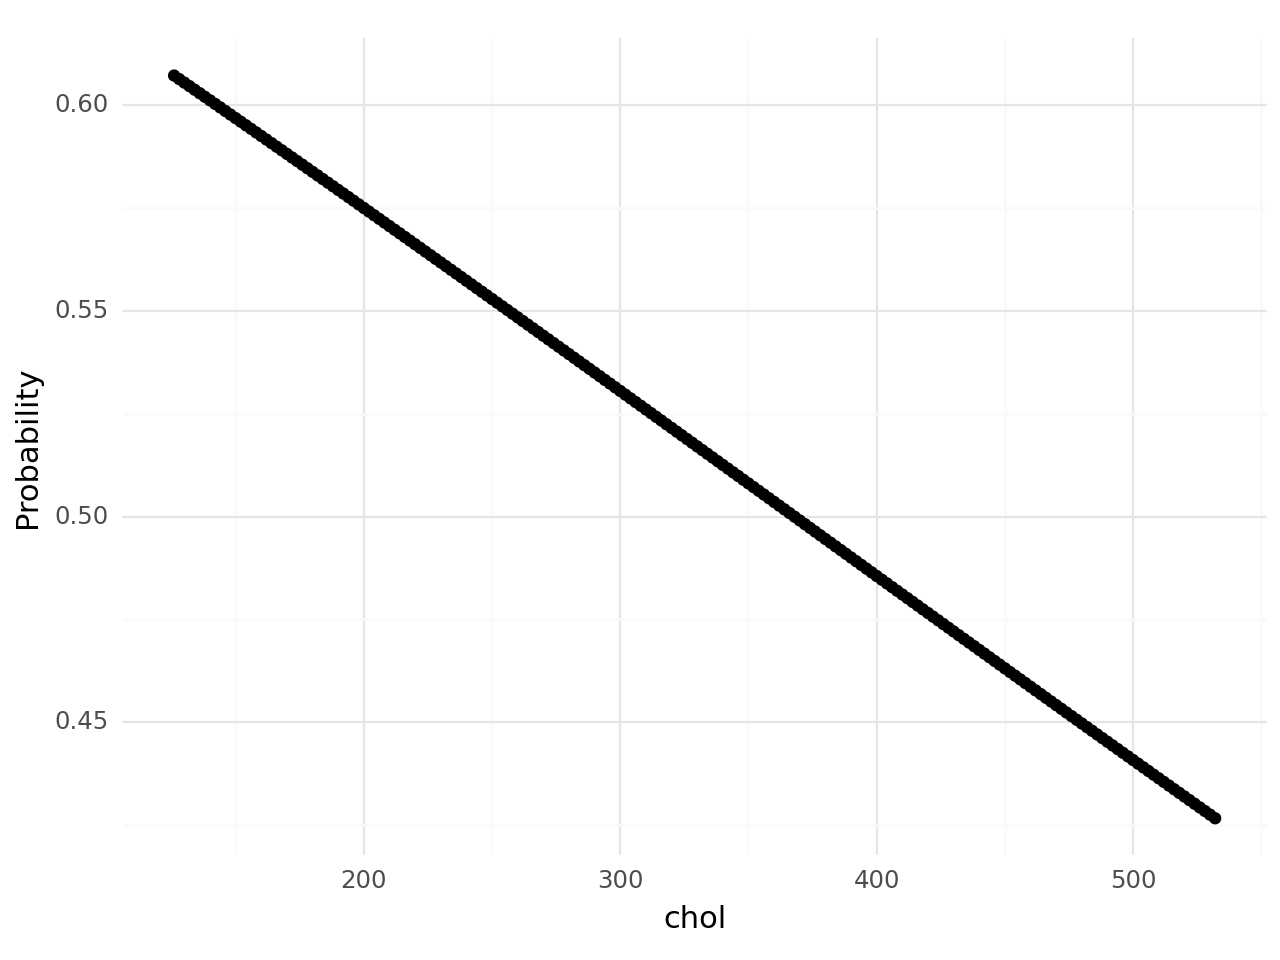

In [9]:
df = pd.DataFrame({'X_test': test_data['chol'], 'prob' : probabilities})

plot = (
    ggplot(df, aes(x='X_test', y='prob')) +
    geom_point(color='black') +
    theme_minimal() +
    labs(title='', x='chol', y='Probability')
)
print(plot)


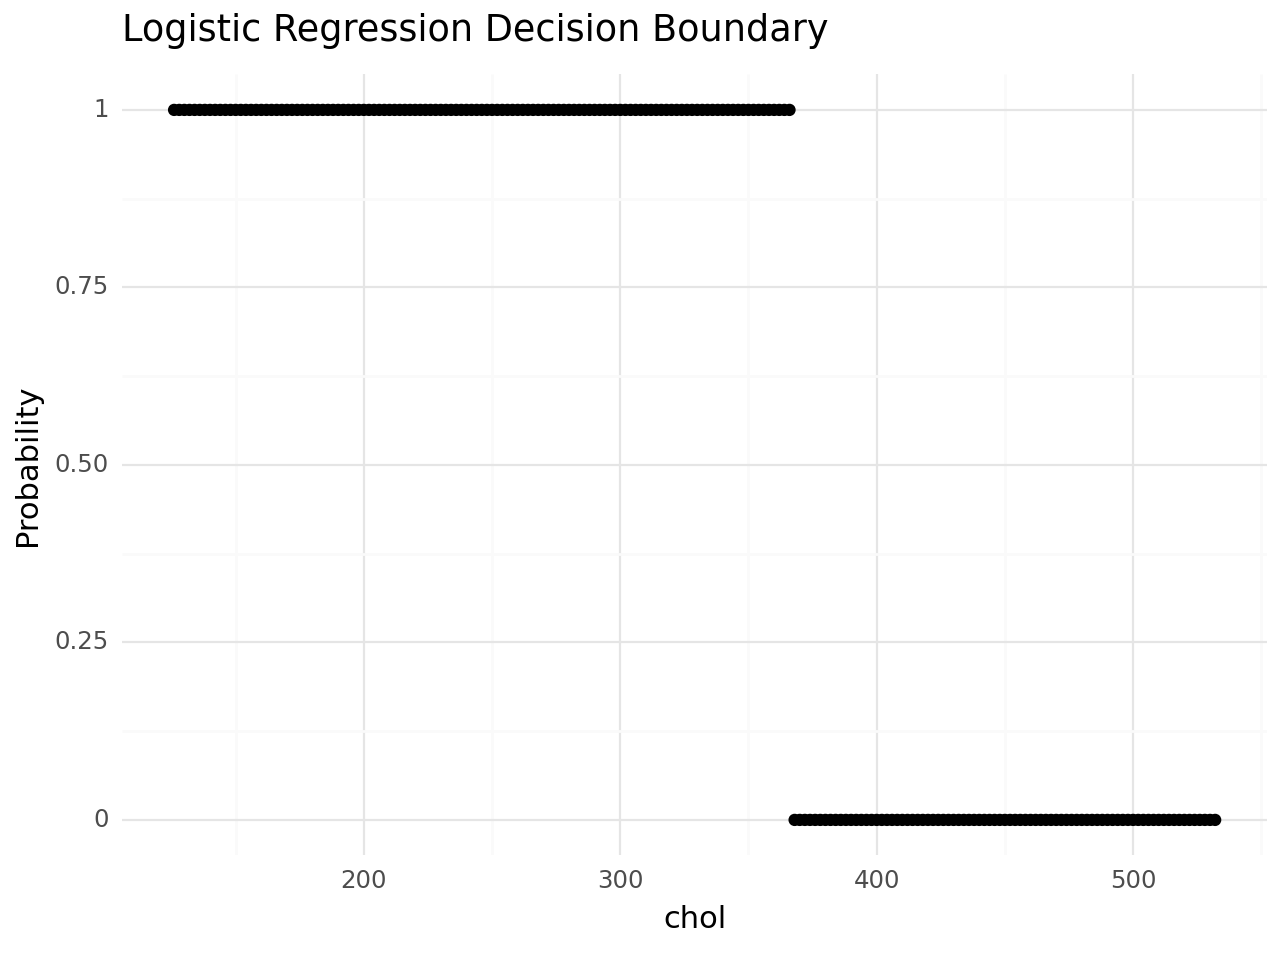

In [10]:
df = pd.DataFrame({'X_test': test_data['chol'], 'y_pred': y_pred})

plot = (
    ggplot(df, aes(x='X_test', y='y_pred')) +
    geom_point(color='black') +
    theme_minimal() +
    labs(title='Logistic Regression Decision Boundary', x='chol', y='Probability')
)

print(plot)

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [12]:
lda = LinearDiscriminantAnalysis()

X = data[['age', 'chol']]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lda_fit = lda.fit(X_train,y_train)

lda_pred = lda_fit.predict(X_test)

print(lda_fit.coef_)
print(lda_fit.intercept_)


#0.03847x + -0.05726_x2 - 2.49 = 0
# x2 = 0.6718x - 43.49

[[ 3.84666235e-02 -5.72576434e-06]]
[-2.49058199]


In [ ]:
X_test = test_data[['age','chol']]
y_pred = lda_fit.predict(X_test)

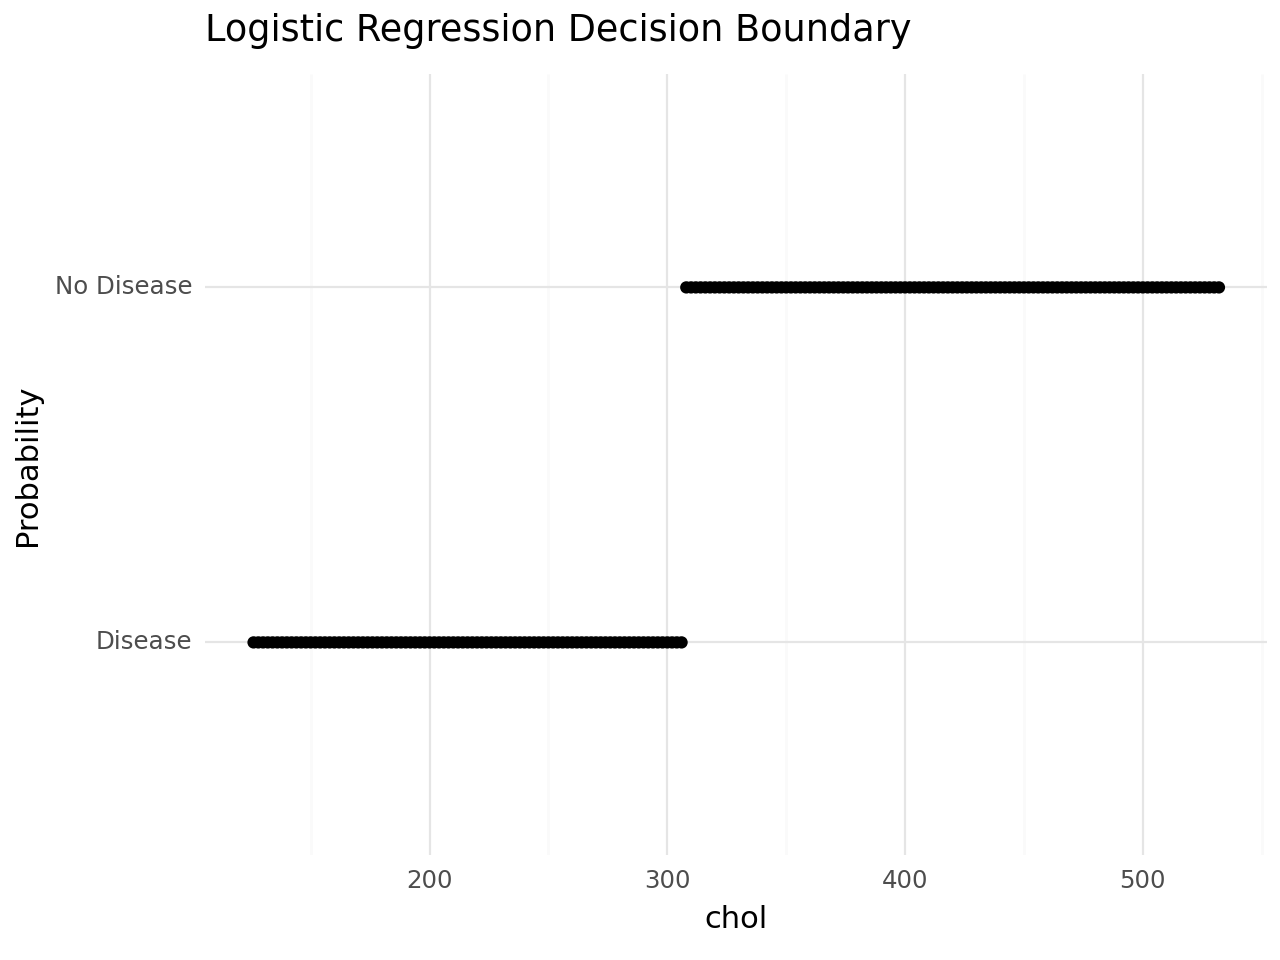

In [ ]:
df = pd.DataFrame({'X_test': test_data['chol'], 'y_pred': y_pred})

plot = (
    ggplot(df, aes(x='X_test', y='y_pred')) +
    geom_point(color='black') +
    theme_minimal() +
    labs(title='Logistic Regression Decision Boundary', x='chol', y='Probability')
)

print(plot)

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
X = data[['age', 'chol']]
y = data['disease']

svc_pipeline = Pipeline([
    ("svc_classifier", SVC())
])

C = {'svc_classifier__C': [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]}

gscv = GridSearchCV(svc_pipeline, C, cv = 5, scoring='accuracy')
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"n": [1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80], "scores": gscv_fitted.cv_results_['mean_test_score']})

,n,scores
0,1,0.539024
1,5,0.563537
2,10,0.617561
3,15,0.637073
4,20,0.627317
5,25,0.622439
6,30,0.617683
7,40,0.622561
8,50,0.617805
9,60,0.603049


In [14]:
X = data[['age', 'chol']]
y = data['disease']

svc_pipeline = Pipeline([
    ("svc_classifier", SVC(C = 15))
])

svc_fit = svc_pipeline.fit(X,y)

support_vectors = svc_fit.named_steps['svc_classifier'].support_vectors_
dual_coefficients = svc_fit.named_steps['svc_classifier'].dual_coef_

# Print or analyze the support vectors and dual coefficients as needed
print("Support Vectors:")
print(support_vectors)
print("Dual Coefficients:")
print(dual_coefficients)

Support Vectors:
[[ 60. 230.]
 [ 62. 263.]
 [ 63. 407.]
 [ 51. 299.]
 [ 41. 172.]
 [ 62. 294.]
 [ 54. 239.]
 [ 58. 225.]
 [ 67. 212.]
 [ 56. 249.]
 [ 60. 253.]
 [ 50. 200.]
 [ 58. 259.]
 [ 44. 290.]
 [ 57. 261.]
 [ 52. 255.]
 [ 57. 276.]
 [ 55. 353.]
 [ 57. 289.]
 [ 59. 273.]
 [ 61. 260.]
 [ 60. 258.]
 [ 52. 204.]
 [ 66. 228.]
 [ 57. 229.]
 [ 56. 288.]
 [ 48. 229.]
 [ 56. 184.]
 [ 62. 267.]
 [ 66. 212.]
 [ 63. 330.]
 [ 50. 243.]
 [ 46. 231.]
 [ 47. 243.]
 [ 58. 230.]
 [ 46. 311.]
 [ 40. 167.]
 [ 56. 283.]
 [ 46. 249.]
 [ 54. 266.]
 [ 61. 166.]
 [ 64. 309.]
 [ 38. 231.]
 [ 42. 315.]
 [ 62. 244.]
 [ 65. 282.]
 [ 55. 289.]
 [ 66. 246.]
 [ 59. 218.]
 [ 54. 188.]
 [ 49. 188.]
 [ 64. 246.]
 [ 54. 206.]
 [ 60. 258.]
 [ 56. 256.]
 [ 57. 274.]
 [ 67. 286.]
 [ 51. 305.]
 [ 53. 203.]
 [ 64. 335.]
 [ 55. 327.]
 [ 67. 237.]
 [ 56. 409.]
 [ 49. 149.]
 [ 63. 269.]
 [ 54. 286.]
 [ 48. 274.]
 [ 60. 185.]
 [ 62. 281.]
 [ 58. 224.]
 [ 65. 254.]
 [ 63. 197.]
 [ 45. 264.]
 [ 52. 230.]
 [ 59. 249.]
 [ 65. 2

In [ ]:
X_test = test_data[['age','chol']]
y_pred = svc_fit.predict(X_test)

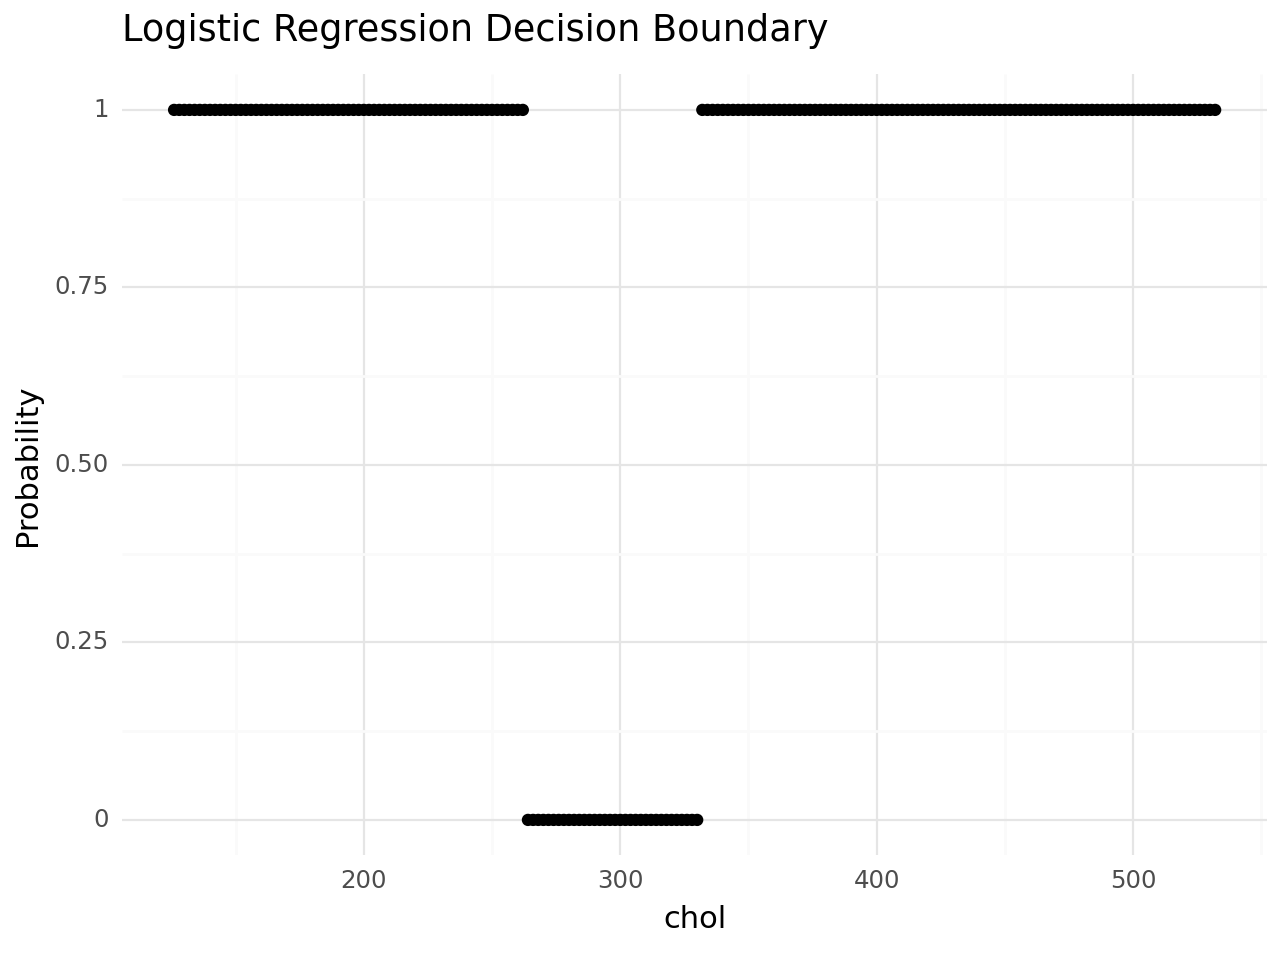

In [ ]:
df = pd.DataFrame({'X_test': test_data['chol'], 'y_pred': y_pred})

plot = (
    ggplot(df, aes(x='X_test', y='y_pred')) +
    geom_point(color='black') +
    theme_minimal() +
    labs(title='Logistic Regression Decision Boundary', x='chol', y='Probability')
)

print(plot)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

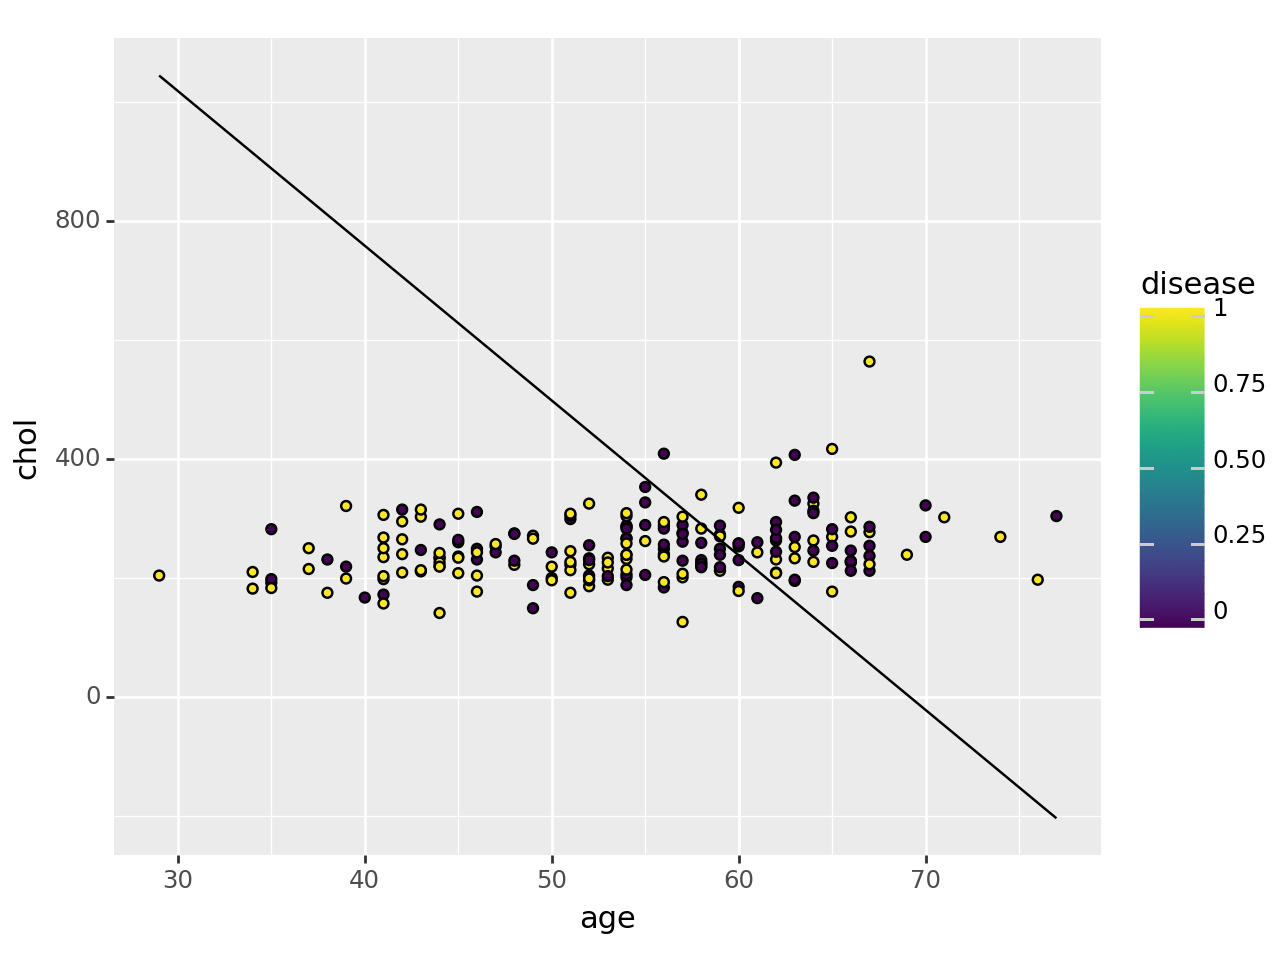

<Figure Size: (640 x 480)>

In [ ]:
#Log Model

(ggplot(data, aes(x='age', y='chol', fill='disease')) +
 geom_point()
 + geom_line(aes(y=-26.03 * data['age'] + 1800))
)



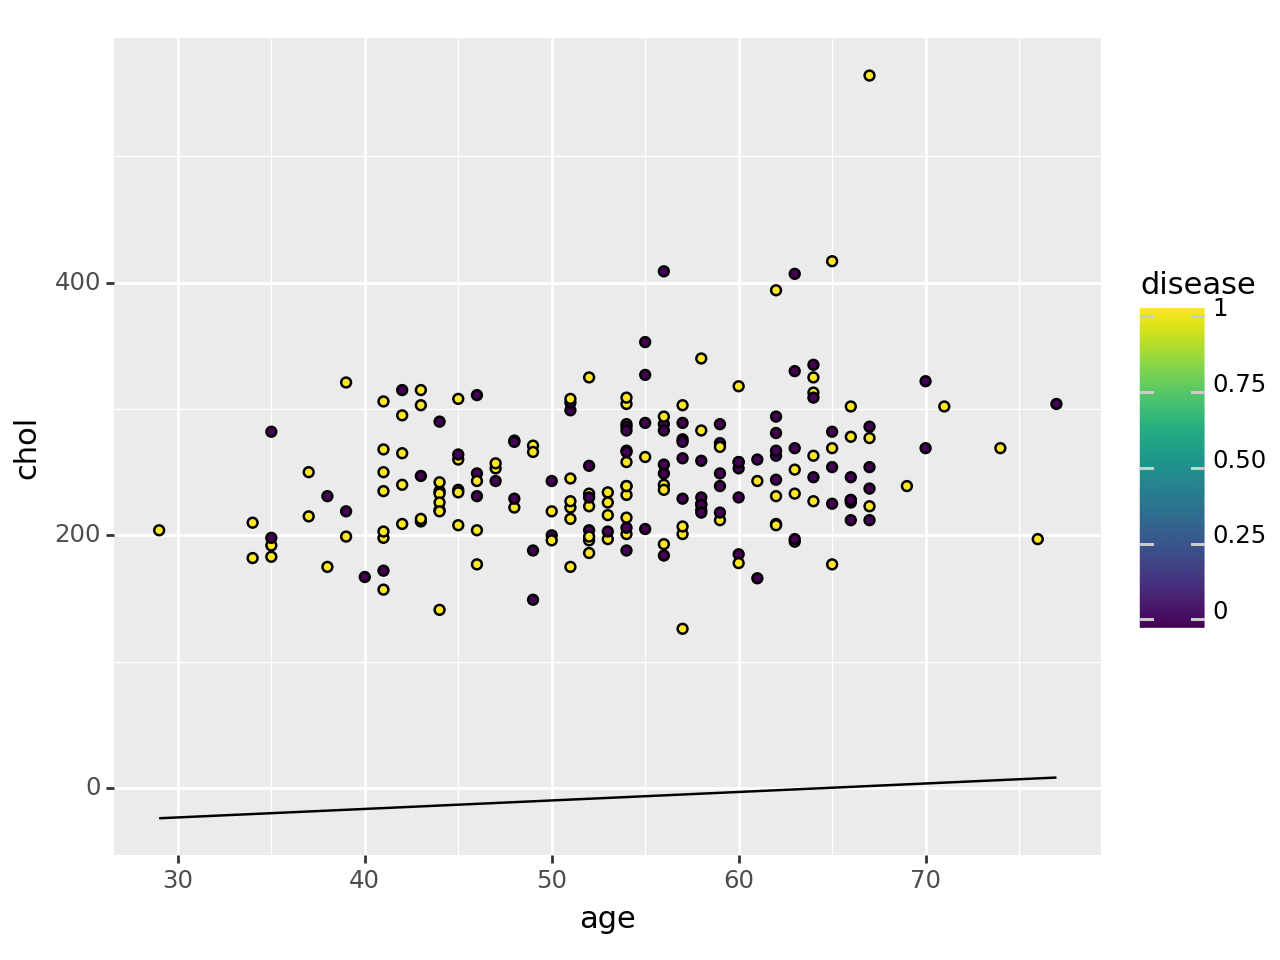

<Figure Size: (640 x 480)>

In [ ]:
#LDA Model

(ggplot(data, aes(x='age', y='chol', fill='disease')) +
 geom_point()
 + geom_line(aes(y= 0.6718 * data['age'] - 43.49))
)